<a href="https://colab.research.google.com/github/zhrsaghaie/DeepLearning/blob/main/Conv_NN_on_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
NUM_CLASSES = 10
BATCH_SIZE = 100
EPOCHS = 10
LEARNING_RATE = 0.001

In [ ]:
# Load the MNIST dataset
train_data = datasets.MNIST(root="data", train=True,  download=True, transform=ToTensor())
test_data =  datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 100394595.92it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 12435652.79it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26716724.86it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10636811.15it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
print(train_data.data.size())
print(train_data.targets.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


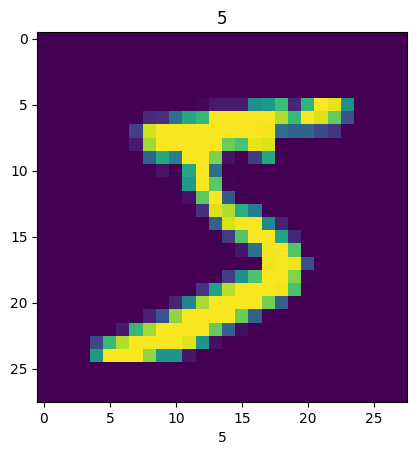

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0])
# plt.title('%i' % train_data.targets[0])
plt.xlabel(f"{train_data.targets[0]}")
plt.show()

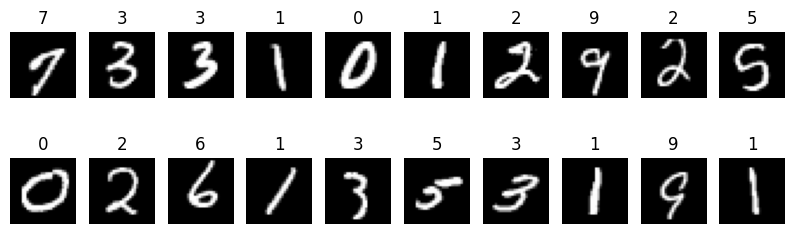

In [ ]:
figure = plt.figure(figsize=(10, 3))
cols, rows = 10, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)


# Iterate over the dataloader
for i, (images, labels) in enumerate(train_loader):
  # Do something with the images and labels
  print(images.shape)
  print(labels.shape)
  break


torch.Size([100, 1, 28, 28])
torch.Size([100])


In [ ]:
# Define the model
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=(3, 3)),
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Conv2d(16, 10, kernel_size=(3, 3)),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),

    nn.Linear(250, 10),
    nn.Softmax(dim=1)
)

model

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 10, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=250, out_features=10, bias=True)
  (8): Softmax(dim=1)
)

In [ ]:
# Train the model
optimizer = torch.optim.Adam(model.parameters(), lr= LEARNING_RATE)
loss_function = nn.CrossEntropyLoss()

print(f"{optimizer = }")
print(f"{loss_function = }")


optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
loss_function = CrossEntropyLoss()


In [ ]:
def one_hot(labels, num_classes):
    return torch.eye(num_classes)[labels]

In [ ]:
train_loader.dataset.train_data.size()

torch.Size([60000, 28, 28])

In [ ]:
train_loader.dataset.train_labels.size()

torch.Size([60000])

In [ ]:
from torch.autograd import Variable




# for epoch in range(1):
for epoch in range(EPOCHS):

  # Total size of dataset for reference
  size = 0

  correct = 0
  _correct = 0

  for inputs, labels in train_loader:
    images = Variable(inputs)   # batch x
    target = Variable(labels)   # batch y

    predictions = model(images)
    one_hot_target = one_hot(target, NUM_CLASSES)
    loss = loss_function(predictions,  one_hot_target)

    # print(f"{predictions.argmax(1) = }")
    # print(f"{predictions.argmax(1).shape = }")
    # print(f"{b_y.shape = }")
    # break



    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



    _correct = (predictions.argmax(1) == target).type(torch.float).sum().item()
    _batch_size = len(inputs)

    correct += _correct
    size += _batch_size

    loss = loss.item()


  correct/=size

  print(f"epoch #{epoch + 1}\t loss: {loss:.4f}")
  print(f"Train Accuracy: {(100*correct):>0.1f}%")



print("Training finished!")


epoch #1	 loss: 1.6073
Train Accuracy: 88.7%
epoch #2	 loss: 1.5786
Train Accuracy: 88.9%
epoch #3	 loss: 1.5351
Train Accuracy: 89.0%
epoch #4	 loss: 1.5551
Train Accuracy: 89.1%
epoch #5	 loss: 1.5673
Train Accuracy: 89.2%
epoch #6	 loss: 1.5450
Train Accuracy: 89.3%
epoch #7	 loss: 1.6205
Train Accuracy: 89.4%
epoch #8	 loss: 1.5487
Train Accuracy: 89.5%
epoch #9	 loss: 1.5891
Train Accuracy: 89.5%
epoch #10	 loss: 1.6177
Train Accuracy: 89.5%
Training finished!


In [ ]:
# Evaluate the model
def test():
  # Test the model
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
      test_output = model(images)


      correct = (test_output.argmax(1) == labels).type(torch.float).sum().item()
      accuracy = correct / float(labels.size(0))

  # print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
  print(f"Test Accuracy of the model on the {len(test_loader) * BATCH_SIZE} test images:: {(100*accuracy):>0.1f}%")


test()


Test Accuracy of the model on the 10000 test images:: 93.0%
